In [2]:
import sys
sys.path.append(".")
sys.path.append("..")
sys.path.append("tests")
from IPython.display import IFrame
import importlib
import numpy as np
import matplotlib.pyplot as plt
from pointparticles.single_particle_dynamics import PointParticle
from part1 import *
%matplotlib notebook

# Part 1: 1-dimensional Spring System
This is the notebook for Part 1 of Project 1:
- The spring system will be implemented in `spring.py` following the outline described in this notebook.
- The implementation will be tested in this notebook.
- This notebook will also test your understanding of the system.

## 1. An overview: Forces in the spring system
Our model involves 2 forces: gravity ($G$) and the spring force ($S$). We'll be working in 1 dimension, called $x$, which points upwards (see figure below). The forces are given by:

$$G=mg\quad\text{and}\quad S=-k(x-x_{eq})$$

Here, the parameters include the mass (of the box) $m$, the gravitational acceleration $g$, the spring constant $k$ and the _natural_ spring equilibrium $x_{eq}$. The natural equilibrium position of the string is dependent on two parameters: the base of the spring ($x_b$) and the natural length of the spring ($L$). The natural length of the spring is the length of the spring when it is neither compressed nor expanded. It should not be difficult to see from the diagram below that

$$x_{eq}=x_b-L$$

The system obeys Newton's second law of motion, namely:

$$\sum F=G+S=ma$$

Here, $a$ is the acceleration resultant of the net force (_net_ = 'total' or 'sum') acting on the box.

<img src="tikzfigures/1dspring.png" alt="SpringSystemDiagram" style="width: 400px;"/>

In the diagram above, the mass is currently below the equilibrium point. This means that the spring force is pointing in the positive $x$ direction (upwards). Because the size (absolute value) of the spring force increases when $x$ goes further away from $x_{eq}$, the spring force eventually becomes stronger than gravity, thus pulling the box back up. This is illustrated in the diagram using the length of the force arrows (vectors): the length of the $S$ arrow is greater than the length of the $G$ arrow, which means the net force $\sum F=G+S$ is pointing upwards.

## 2. Functors
Before continuing to the main task we need to take a closer look on _functors_ in Python. A functor is similar to a function in that it takes an input and provides an output. The syntax for calling functors is exactly the same as for functions:
```
# f : a function accepting a single integer parameter
# g : a functor  accepting a single integer parameter

x = 1  # integer

f(x)  # calls the function f
g(x)  # calls the functor  g
```
Recall that _everything is an object_ in Python. So functions are actually also objects (or classes). So what's the difference between a function and a functor? The `function` class is a built-in type in Python, while a functor is a user-defined class that behaves like a function. To make a class a function, we need to implement the  *magic method*: `__call__`.

But let's slow down. If functions and functors are just the same, why bother using functors at all? Why not just use functions? Consider the following linear function:

In [ ]:
def linear_function(x, a=1, b=0):
    return a*x + b

# default behaviour
print(linear_function(1))

# specified behaviour
print(linear_function(1, a=2, b=1))

There's nothing wrong about this function. In fact, it's actually pretty great since it allows us to specify `a` and `b` if we want to (as shown in the example above). However, it's not very practical if we want to pass it along to another function that wants to use this function. Why? Well, consider this:

In [ ]:
def multiply_output(x, n, f):
    return n*f(x)

# unable to specify 'a' and 'b'
multiply_output(1, 2, linear_function)

Without writing additional code (e.g. change the parameters of `multiply_output`), there's no way of specifying `a` and `b`. We always want to keep our code nice and tidy, so this is a problem. Luckily, functors come to the rescue. Here's the same linear function as a functor:

In [ ]:
class Linear_Functor:
    def __init__(self, a=1, b=0):
        self.a = a
        self.b = b
    def __call__(self, x):
        return self.a*x + self.b

We can now easily create a linear function for which we only have to specify `a` and `b` once:

In [ ]:
# create functor
F = Linear_Functor(a=2, b=3)

# we can now pass F knowing that 'a' and 'b' are specified
print(multiply_output(1, 2, F))

# since F is an object, we can change 'a' and 'b' whenever we want
F.a = 1
F.b = 0

# now with 'a' and 'b' changed to the default output of linear_function
print(multiply_output(1, 2, F))

### Task:
Write a functor called `Quadratic_Functor` that implements a quadratic function:

$$f(x)=ax^2+bx+c$$

The parameters should have defaults values `a=1`, `b=0` and `c=0`, and the implementation should pass the test below.

In [ ]:
# implement the functor here

Once you have finished your implementation, run the test below.

In [ ]:
test_Quadratic_Functor(Quadratic_Functor)

## 3. Let's Get Started
We now want to apply our new-found love for functors to the forces in the spring system. Your task is to implement a functor called `NetSpringForce`, which takes into account both gravity and the spring force. These are some requirements for the functor:
1. The functor should  store the following arguments: `m`, `k`, `g`, `xb` and `L`. The `__init__` constructor should take these arguments in the provided order. The definitions of these parameters are provided above.
2. The `__call__` method should return the net force acting on the box, i.e., $\sum F$.
3. In order for the `__call__` method to be compatible with `PointParticle`, it needs to take 4 arguments: `self`, `t`, `r` and `v` (in that order).
3. Some people prefer to write `g=-9.81` and say that the gravitational force is `G=mg`, while others write `g=9.81` and say that `G=-mg`. We don't want these two cases to be mixed up, so make sure `g` can be both positive and negative.
4. As default values, set `g=9.81`, `xb=1` and `L=1`.

The following code cell will test your implementation. If the test is successful, a graph of the motion is presented.

Nice Work! Your implementation was successful!


<IPython.core.display.Javascript object>


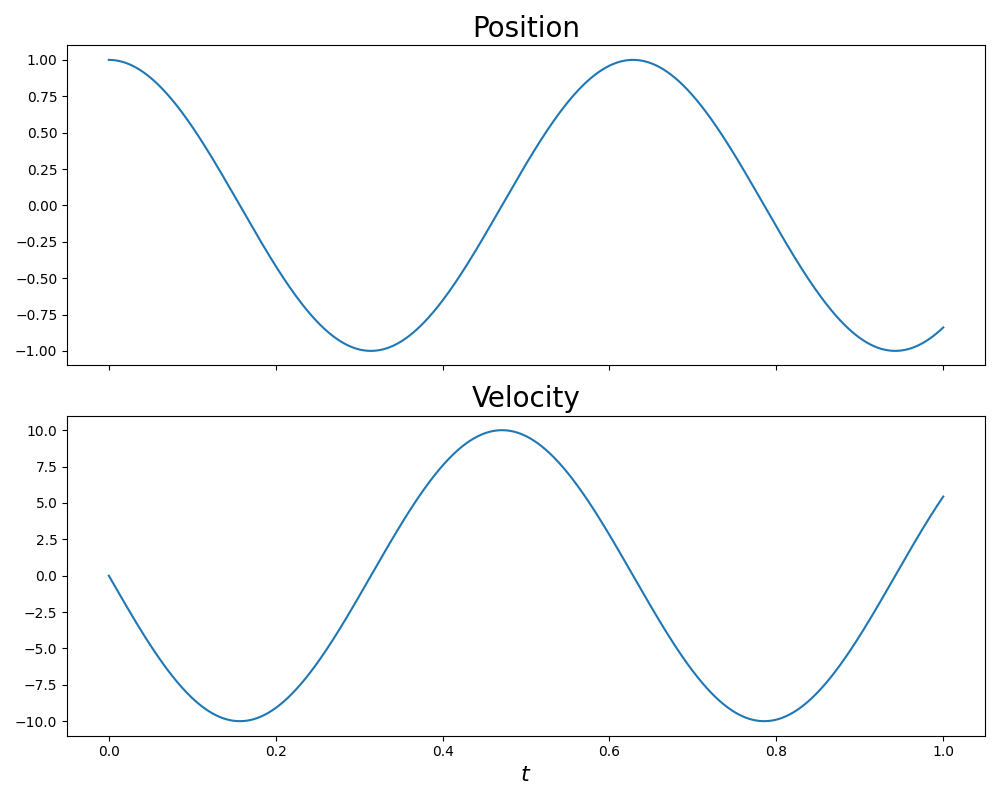

In [3]:
# you need to run this to update NetSpringForce if you change anything in spring.py
import spring
from spring import NetSpringForce
spring = importlib.reload(spring)

test_NetSpringForce(NetSpringForce, PointParticle)

For the remainder of Part 1 of the project, you will investigate the behaviour of the spring system using your model.

## 4. Zero Gravity
Let's now take a step back and look at the zero gravity case. Why? Well, in order to understand how gravity affects the system, we need to know how the system functions without gravity.

Let's set the stage by setting up a box with a mass of 1 $kg$ in a gravityless spring system.

<IPython.core.display.Javascript object>


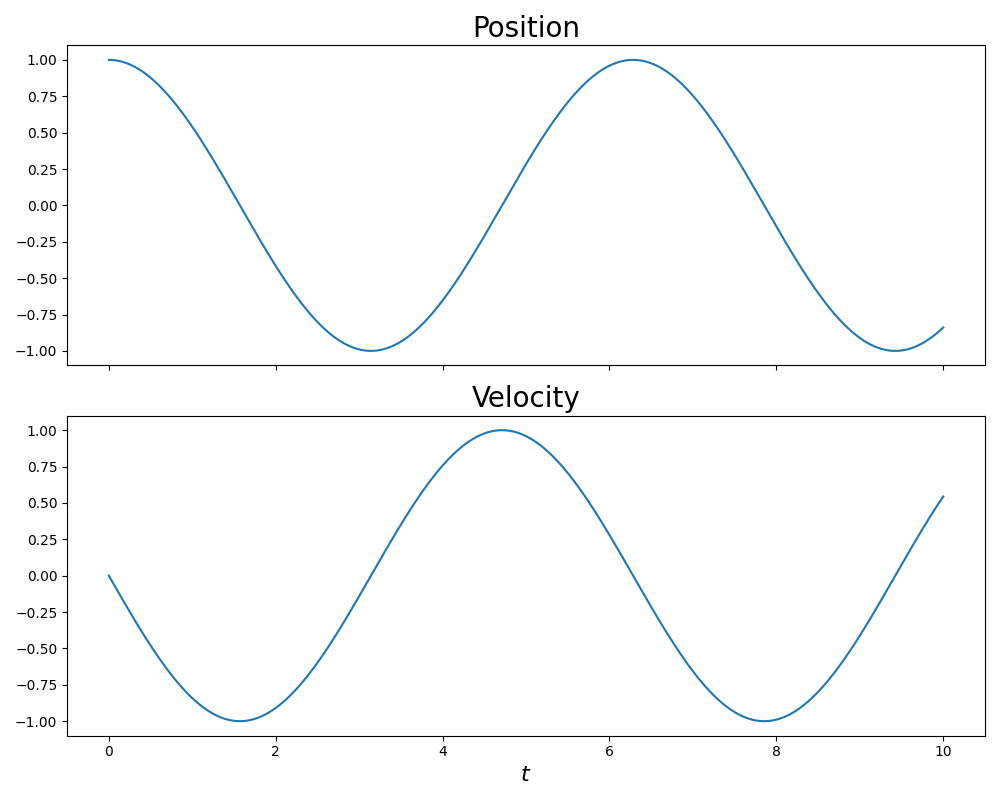

In [4]:
box = PointParticle(mass=1)
F = NetSpringForce(m=box.mass, k=1, g=0)
box.simulate_path(F, dt=1e-4, N=1e5, r0=1, v0=0)
box.plot()

*Surprise surprise*, it's a sinusoidal curve! Or is it so obvious? Recall this spring does not experience gravity, meaning it might as well be floating in dead space, but it's still swinging back and forth! This is because of the spring force, of course (as there are no other forces involved). Regardless of whether gravity is pulling it down or not, the spring force will always try to pull the box towards the equilibrium position. **Hence, for all springs, it's not gravity that makes it start to fall down at** `t=0`. Sure, gravity may help, but it's not required.

### Investigation: What does `m` do?
Let's consider what happens when we increase `m`. Run the following code and study the results.

<IPython.core.display.Javascript object>


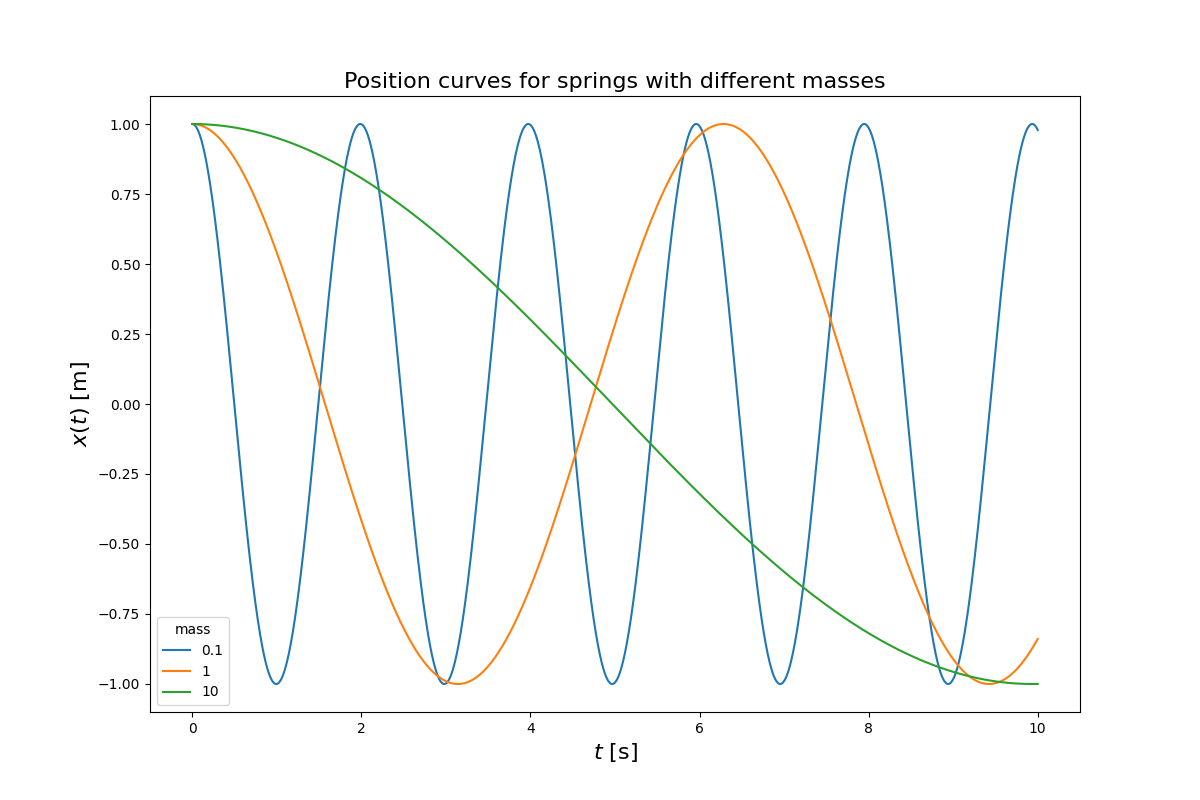

In [5]:
# prepare figure
plt.figure(figsize=(12,8))

# loop over m values 0.1, 1, 10
for m in [0.1, 1, 10]:
    
    # prepare and simulate spring
    box = PointParticle(mass=m)
    F = NetSpringForce(m=box.mass, k=1, g=0)
    box.simulate_path(F, dt=1e-4, N=1e5, r0=1, v0=0)
    
    # plot path
    plt.plot(box.t, box.r[:,0], label=m)

# finish plot
plt.legend(title="mass")
plt.title("Position curves for springs with different masses", fontsize=16)
plt.xlabel(r"$t$ [s]", fontsize=16)
plt.ylabel(r"$x(t)$ [m]", fontsize=16)
plt.show()

#### Question: Describe the relationship between the mass and the frequency of the oscillation. Is anything else affected?

Answer: We clearly see that the frequency is inversely proportional to the mass. This is because the acceleration of the spring can be expressed as a ratio of k and m multiplied by the mass' distance to the point of equilibrium. Assuming all other variables are constant across all three cases, our acceleration will be proportional to the inverse of the mass, as the three graphs show.



### Investigation: What does `k` do?
First things first: What is `k`?

#### Task: Use Newton's second law of motion to find the units of `k` (ignore gravity).

Answer:

The spring constant is measure the amount of force required to extend or compress the string. That is, it measures how *stiff* or *flexible* a spring is.

Alright, let's now do the same for `k` as we did for `m`:

<IPython.core.display.Javascript object>


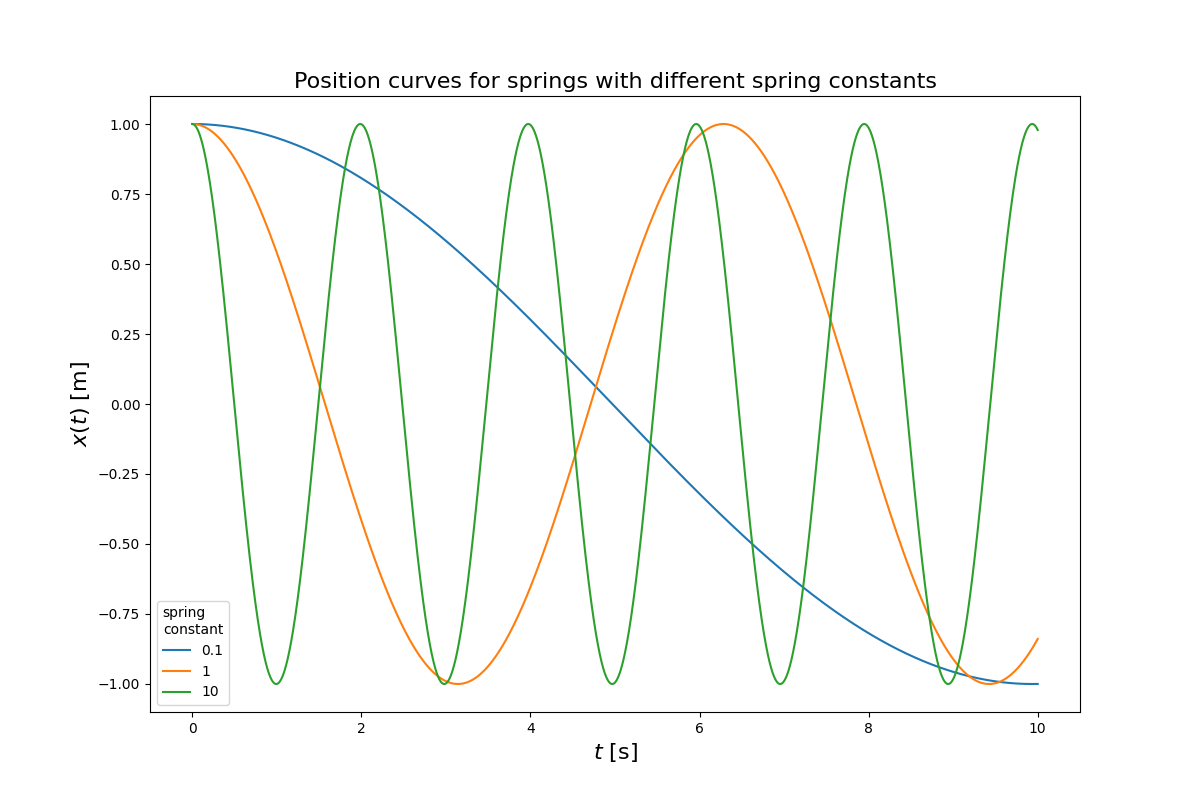

In [6]:
# prepare figure
plt.figure(figsize=(12,8))

# loop over m values 0.1, 1, 10
for k in [0.1, 1, 10]:
    
    # prepare and simulate spring
    box = PointParticle(mass=1)
    F = NetSpringForce(m=box.mass, k=k, g=0)
    box.simulate_path(F, dt=1e-4, N=1e5, r0=1, v0=0)
    
    # plot path
    plt.plot(box.t, box.r[:,0], label=k)

# finish plot
plt.legend(title="spring\nconstant")
plt.title("Position curves for springs with different spring constants", fontsize=16)
plt.xlabel(r"$t$ [s]", fontsize=16)
plt.ylabel(r"$x(t)$ [m]", fontsize=16)
plt.show()

#### Question: Describe the relationship between the spring constant and the frequency of the oscillation. How is it different from the frequency's relationship with mass?

Answer: 

### Investigation: Final look at `m` and `k`.
You might have noticed that the graphs you got from changing `k` are exactly the same graphs you got from changing `m`, but in reverse order. This is not a coincidence. The truth comes from the fact that the *angular* frequency of the oscillation is given by

$$2\pi f=\omega=\sqrt{\frac{k}{m}}$$

This means that the curves we see in the graphs above are cosine curves on the form $\cos(\omega t)$ (they're cosine curves and not sinus curves because they start at the top of the wave). You can prove this mathematically, but that's beyond the scope of what we're interested in. We're instead going to check this numerically.

#### Task: Finish the loop below and prove that the frequency of the curves are constant if $k/m$ is constant.

In [ ]:
# prepare figure
plt.figure(figsize=(12,8))

# for ...
    
    # prepare and simulate spring
    # box = ...
    # F = ...
    box.simulate_path(F, dt=1e-4, N=1e5, r0=1, v0=0)
    
    # plot path
    plt.plot(box.t, box.r[:,0], label= #... )  # choose your own label

# finish plot
plt.legend(title="") # choose your own legend title
plt.title(r"Position curves for different springs with equal $k/m$ ratios", fontsize=16)
plt.xlabel(r"$t$ [s]", fontsize=16)
plt.ylabel(r"$x(t)$ [m]", fontsize=16)
plt.show()

## 5. G for Gravity
Now that we've gotten comfortable with the spring itself, let's add gravity into the mix. Let's use the same example as the one we used for Zero Gravity:

In [ ]:
box = PointParticle(mass=1)
F = NetSpringForce(m=box.mass, k=1, g=9.81)
box.simulate_path(F, dt=1e-4, N=1e5, r0=1, v0=0)
box.plot()

#### Task: Describe the difference and similarities between this plot and the same plot in the Zero Gravity example (note the axes!).

Answer:

To understand how gravity affects the spring, let's try shifting the initial starting position down.

In [ ]:
box = PointParticle(mass=1)
F = NetSpringForce(m=box.mass, k=1, g=9.81)
shift = F.m*F.g/F.k  # calculate shift
box.simulate_path(F, dt=1e-4, N=1e5, r0=1-shift, v0=0)  # adjust initial position by the shift
box.plot()

#### Task: Check that the `shift` variable is in units of *meters* (so that doing `r0=1-shift` makes sense).

Show your work:

#### Question: Describe the plot above and compare it with both the Zero Gravity plot and the previous plot. Make special note of the axes.

Answer:

#### Question: What does gravity do in this system?

Answer:

## 6. Go nuts
As a final challenge, make 3 unique spring systems that display different scenarios. You can mess around with whatever you want: `m`, `k`, `g`, `xb` and `L`. Maybe try using the gravitational acceleration from Mars (Google it)? You can also fiddle with `dt` and `N` if you want (/dare).

In [ ]:
# spring 1

In [ ]:
# spring 2

In [ ]:
# spring 3